In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [305]:
rwf_df = pd.read_csv(r"C:\Users\SONY\Downloads\weatherAUS.csv")
rwf_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [306]:
rwf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# DATA CLEANING 

In [307]:
rwf_df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [308]:
rwf_df['RainToday'] = rwf_df['RainToday'].fillna(rwf_df['RainToday'].mode()[0])

In [309]:
rwf_df['RainTomorrow'] = rwf_df['RainTomorrow'].fillna(rwf_df['RainTomorrow'].mode()[0])

In [310]:
rwf_df['WindDir9am'] = rwf_df['WindDir9am'].fillna(rwf_df['WindDir9am'].mode()[0])

In [311]:
rwf_df['WindDir3pm'] = rwf_df['WindDir3pm'].fillna(rwf_df['WindDir3pm'].mode()[0])

In [312]:
rwf_df['WindGustDir'] = rwf_df['WindGustDir'].fillna(rwf_df['WindGustDir'].mode()[0])

In [313]:
rwf_df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [314]:
rwf_df['MinTemp'] = rwf_df['MinTemp'].fillna( rwf_df['MinTemp'].dropna().mean() )


In [315]:
rwf_df['MaxTemp'] = rwf_df['MaxTemp'].fillna( rwf_df['MaxTemp'].dropna().mean() )


In [316]:
rwf_df['Rainfall'] = rwf_df['Rainfall'].fillna( rwf_df['Rainfall'].dropna().mean() )


In [317]:
rwf_df['Evaporation'] = rwf_df['Evaporation'].fillna( rwf_df['Evaporation'].dropna().mean() )


In [318]:
rwf_df['Sunshine'] = rwf_df['Sunshine'].fillna( rwf_df['Sunshine'].dropna().mean() )


In [319]:
rwf_df['WindGustSpeed'] = rwf_df['WindGustSpeed'].fillna( rwf_df['WindGustSpeed'].dropna().mean() )


In [320]:
rwf_df['WindSpeed9am'] = rwf_df['WindSpeed9am'].fillna( rwf_df['WindSpeed9am'].dropna().mean() )


In [321]:
rwf_df['WindSpeed3pm'] = rwf_df['WindSpeed3pm'].fillna( rwf_df['WindSpeed3pm'].dropna().mean() )


In [322]:
rwf_df['Humidity9am'] = rwf_df['Humidity9am'].fillna( rwf_df['Humidity9am'].dropna().mean() )


In [323]:
rwf_df['Humidity3pm'] = rwf_df['Humidity3pm'].fillna( rwf_df['Humidity3pm'].dropna().mean() )


In [324]:
rwf_df['Pressure9am'] = rwf_df['Pressure9am'].fillna( rwf_df['Pressure9am'].dropna().mean() )


In [325]:
rwf_df['Pressure3pm'] = rwf_df['Pressure3pm'].fillna( rwf_df['Pressure3pm'].dropna().mean() )


In [326]:
rwf_df['Cloud9am'] = rwf_df['Cloud9am'].fillna( rwf_df['Cloud9am'].dropna().mean() )


In [327]:
rwf_df['Cloud3pm'] = rwf_df['Cloud3pm'].fillna( rwf_df['Cloud3pm'].dropna().mean() )


In [328]:
rwf_df['Temp9am'] = rwf_df['Temp9am'].fillna( rwf_df['Temp9am'].dropna().mean() )


In [329]:
rwf_df['Temp3pm'] = rwf_df['Temp3pm'].fillna( rwf_df['Temp3pm'].dropna().mean() )


In [330]:
rwf_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [331]:
rwf_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [332]:
# Checking the counts of label categories
RainTomorrow = rwf_df['RainTomorrow'].value_counts(normalize=True)
round(RainTomorrow * 100, 2).astype('str') + ' %'

No     76.37 %
Yes    23.63 %
Name: RainTomorrow, dtype: object

Observations:

The dataset is unbalanced, as the dependent feature 'RainTomorrow' contains 76.37% values have RainTomorrow as no and 23.63% values have RainTomorrow as yes.

In [337]:
rwf_df.replace({'Yes':1, 'No':0}, inplace=True)


In [338]:
rwf_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


# Step 2: Exploratory Data Analysis


2.1: Univariate Analysis


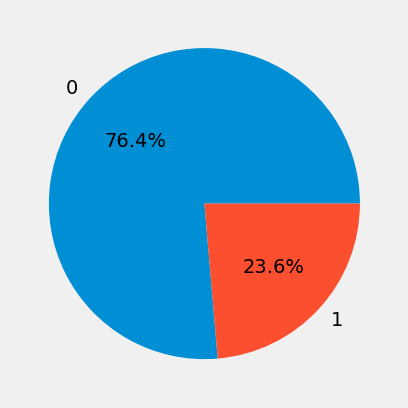

In [339]:
# Creating a barplot for 'RainTomorrow'
plt.pie(rwf_df['RainTomorrow'].value_counts().values,
		labels = rwf_df['RainTomorrow'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


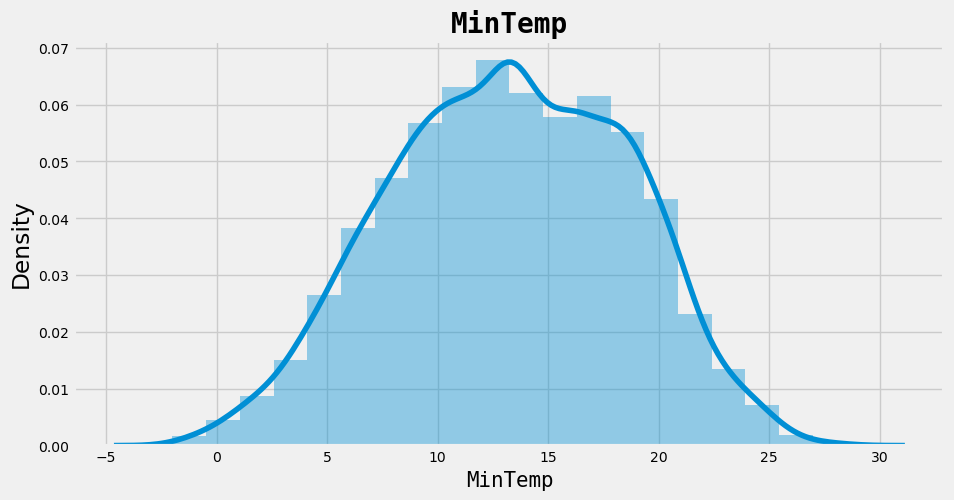

In [340]:
# Creating a distribution plot for 'MinTemp'
MinTemp = rwf_df['MinTemp'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(rwf_df['MinTemp'], bins=20)
plt.title('MinTemp', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('MinTemp', fontdict={'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=10)
plt.show()

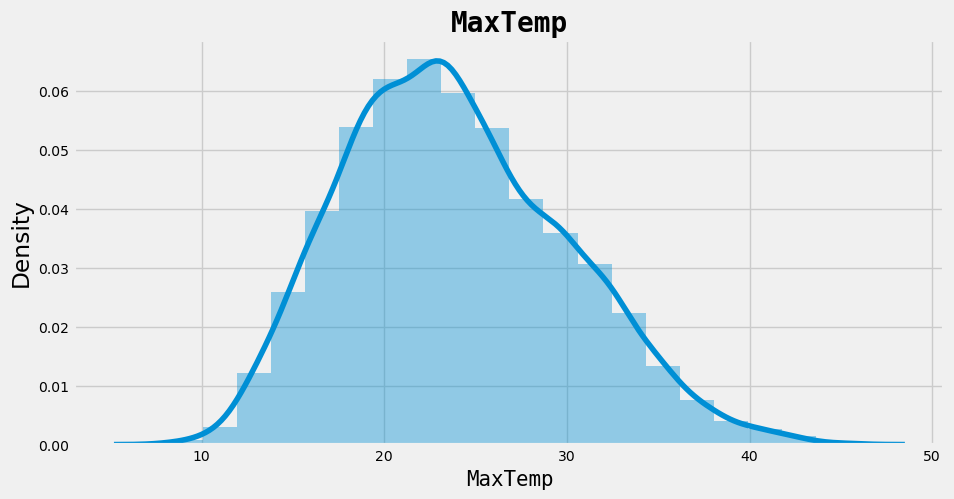

In [341]:
# Creating a distribution plot for 'MaxTemp'
MaxTemp = rwf_df['MaxTemp'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(rwf_df['MaxTemp'], bins=20)
plt.title('MaxTemp', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('MaxTemp', fontdict={'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=10)
plt.show()

2.2 Bivariate Analysis

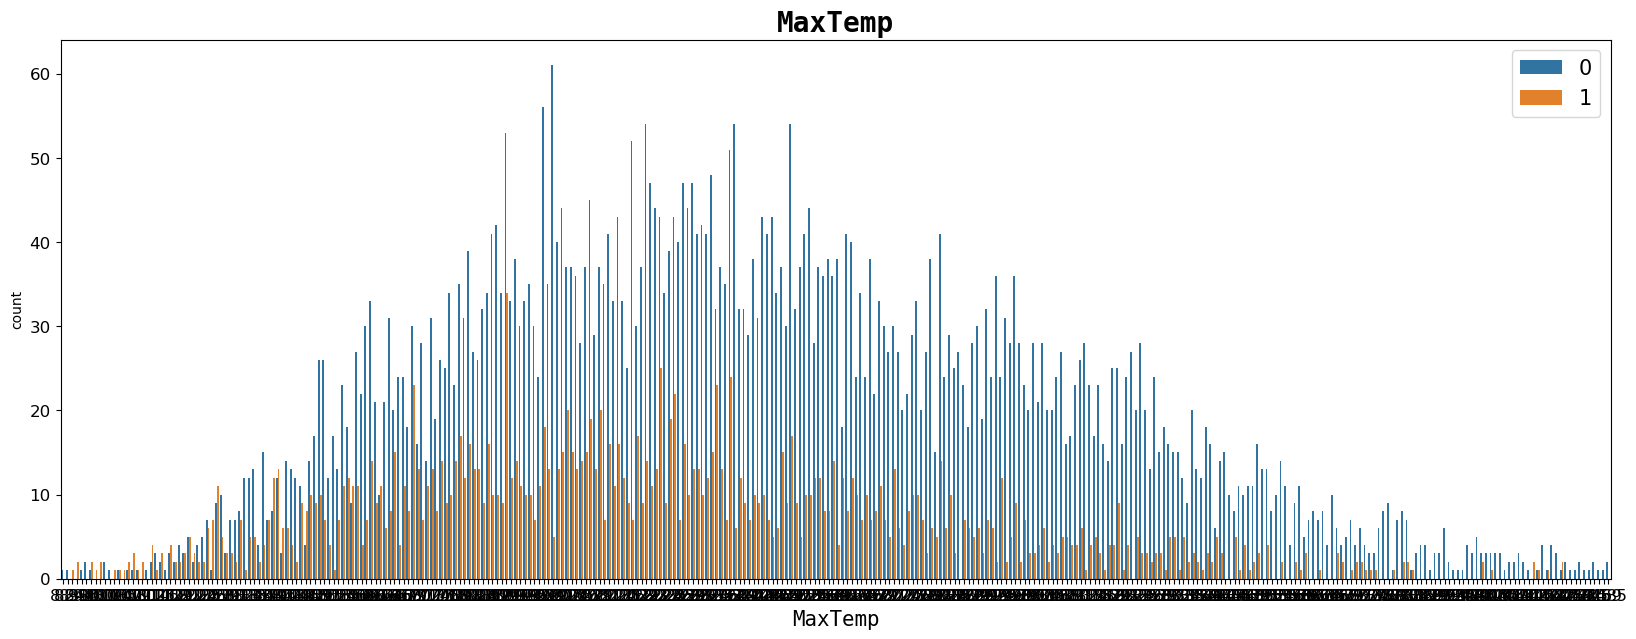

In [342]:
# Creating a countplot of maxtemp across rainfall
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(rwf_df['MaxTemp'], hue=rwf_df['RainTomorrow'])
plt.title('MaxTemp', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('MaxTemp', fontdict={'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


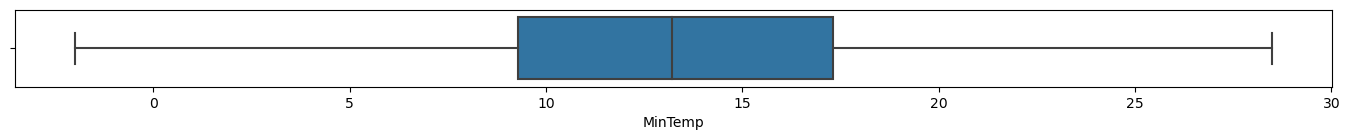

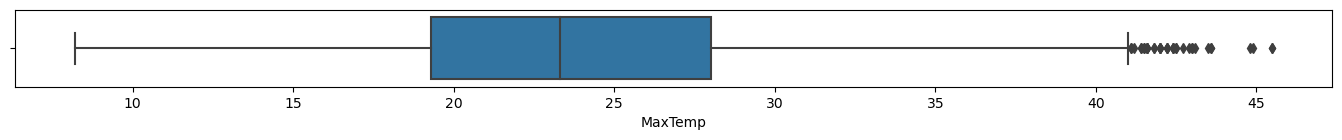

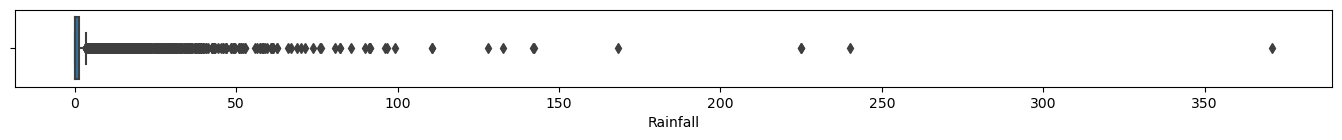

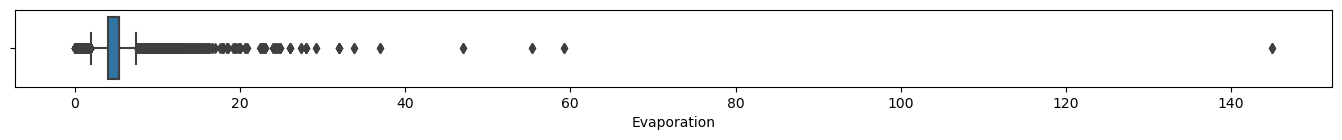

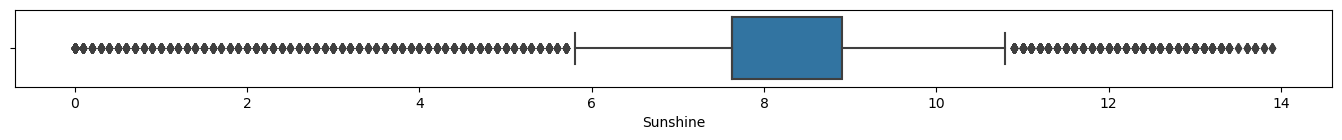

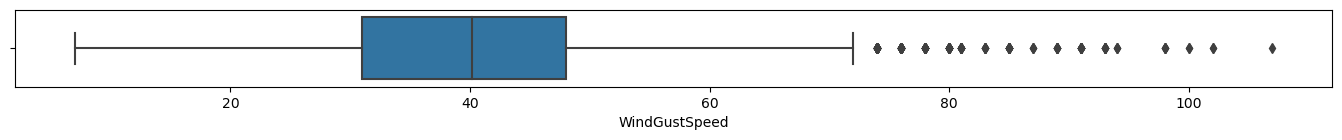

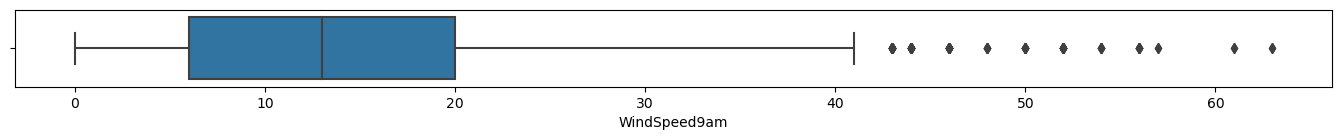

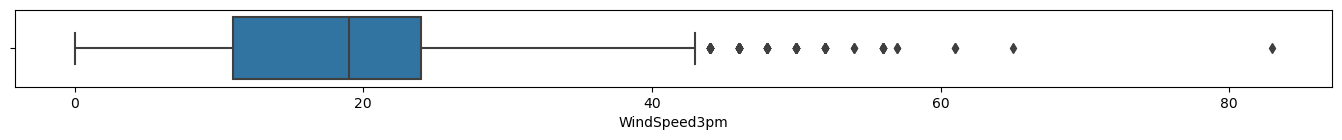

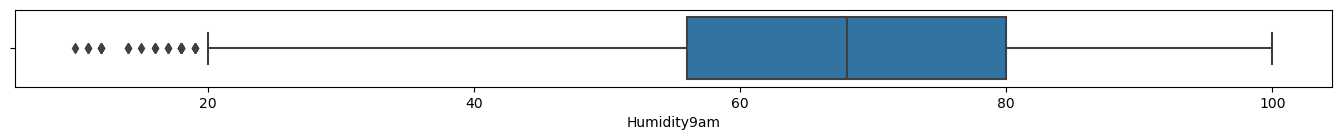

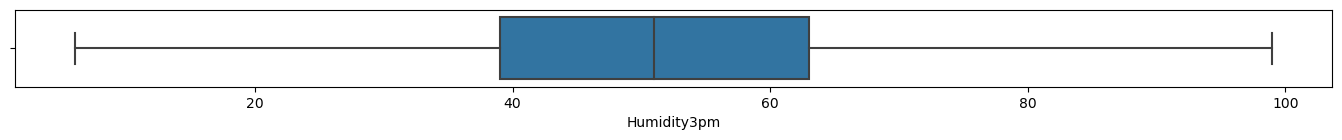

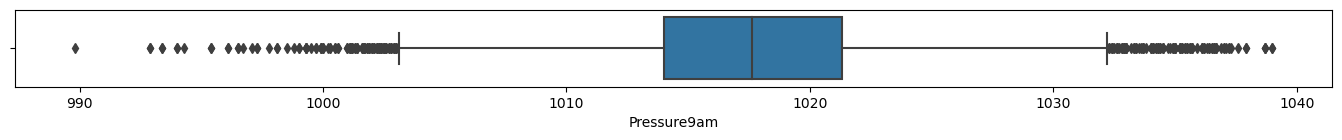

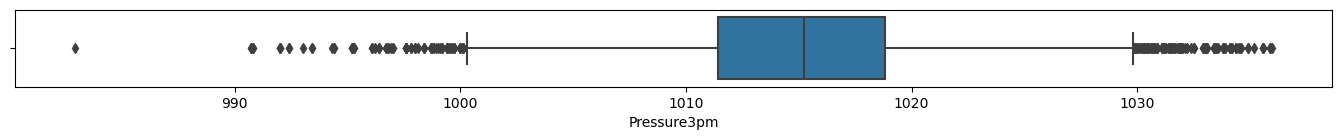

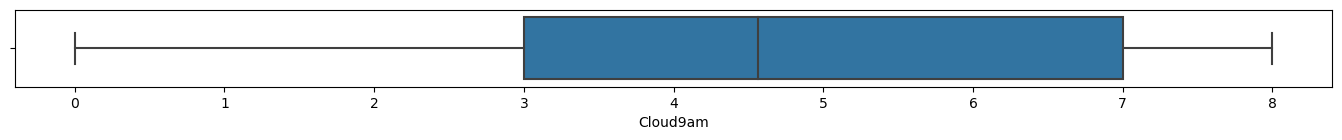

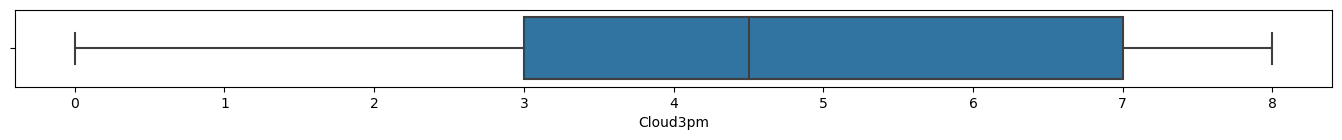

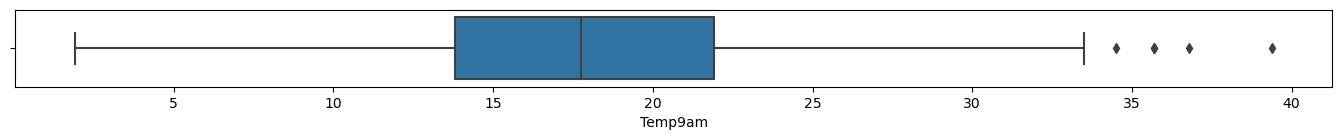

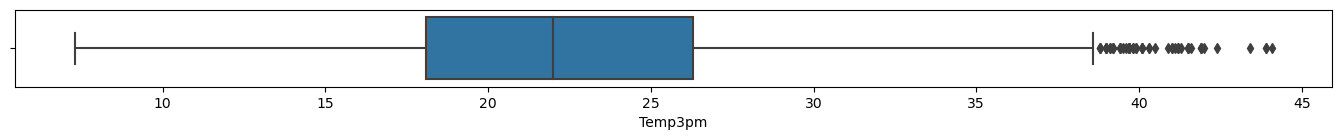

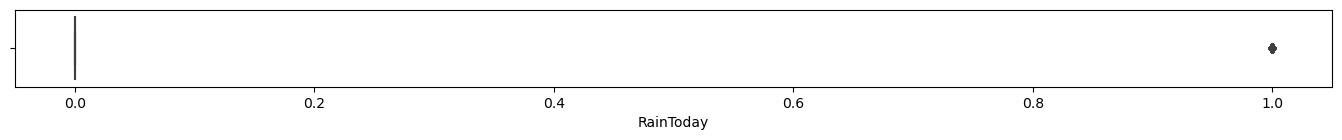

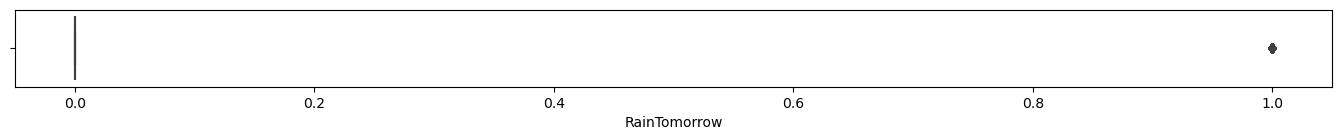

In [343]:
rwf_df_1=rwf_df.select_dtypes(exclude=['object'])
for column in rwf_df_1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=rwf_df, x=column)


In [344]:
Q1=rwf_df['MaxTemp'].quantile(0.25)
Q2=rwf_df['MaxTemp'].quantile(0.5)
Q3=rwf_df['MaxTemp'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

6.250000000000002
41.05


In [345]:
rwf_df['MaxTemp'] = np.where(rwf_df['MaxTemp']> upplim,upplim,
                        np.where(rwf_df['MaxTemp']<lowlim,lowlim, rwf_df['MaxTemp']))

In [346]:
Q1=rwf_df['Rainfall'].quantile(0.25)
Q2=rwf_df['Rainfall'].quantile(0.5)
Q3=rwf_df['Rainfall'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-2.0999999999999996
3.4999999999999996


In [347]:
rwf_df['Rainfall'] = np.where(rwf_df['Rainfall']> upplim,upplim,
                        np.where(rwf_df['Rainfall']<lowlim,lowlim, rwf_df['Rainfall']))

In [348]:
Q1=rwf_df['Evaporation'].quantile(0.25)
Q2=rwf_df['Evaporation'].quantile(0.5)
Q3=rwf_df['Evaporation'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

1.9159067779360868
7.473488703439855


In [349]:
rwf_df['Evaporation'] = np.where(rwf_df['Evaporation']> upplim,upplim,
                        np.where(rwf_df['Evaporation']<lowlim,lowlim, rwf_df['Evaporation']))

In [350]:
Q1=rwf_df['Sunshine'].quantile(0.25)
Q2=rwf_df['Sunshine'].quantile(0.5)
Q3=rwf_df['Sunshine'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

5.73051229970663
10.801692620176022


In [351]:
rwf_df['Sunshine'] = np.where(rwf_df['Sunshine']> upplim,upplim,
                        np.where(rwf_df['Sunshine']<lowlim,lowlim, rwf_df['Sunshine']))

In [352]:
Q1=rwf_df['WindGustSpeed'].quantile(0.25)
Q2=rwf_df['WindGustSpeed'].quantile(0.5)
Q3=rwf_df['WindGustSpeed'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

5.5
73.5


In [353]:
rwf_df['WindGustSpeed'] = np.where(rwf_df['WindGustSpeed']> upplim,upplim,
                        np.where(rwf_df['WindGustSpeed']<lowlim,lowlim, rwf_df['WindGustSpeed']))

In [354]:
Q1=rwf_df['WindSpeed9am'].quantile(0.25)
Q2=rwf_df['WindSpeed9am'].quantile(0.5)
Q3=rwf_df['WindSpeed9am'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-15.0
41.0


In [355]:
rwf_df['WindSpeed9am'] = np.where(rwf_df['WindSpeed9am']> upplim,upplim,
                        np.where(rwf_df['WindSpeed9am']<lowlim,lowlim, rwf_df['WindSpeed9am']))

In [356]:
Q1=rwf_df['WindSpeed3pm'].quantile(0.25)
Q2=rwf_df['WindSpeed3pm'].quantile(0.5)
Q3=rwf_df['WindSpeed3pm'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-8.5
43.5


In [357]:
rwf_df['WindSpeed3pm'] = np.where(rwf_df['WindSpeed3pm']> upplim,upplim,
                        np.where(rwf_df['WindSpeed3pm']<lowlim,lowlim, rwf_df['WindSpeed3pm']))

In [358]:
Q1=rwf_df['Humidity9am'].quantile(0.25)
Q2=rwf_df['Humidity9am'].quantile(0.5)
Q3=rwf_df['Humidity9am'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

20.0
116.0


In [359]:
rwf_df['Humidity9am'] = np.where(rwf_df['Humidity9am']> upplim,upplim,
                        np.where(rwf_df['Humidity9am']<lowlim,lowlim, rwf_df['Humidity9am']))

In [360]:
Q1=rwf_df['Pressure9am'].quantile(0.25)
Q2=rwf_df['Pressure9am'].quantile(0.5)
Q3=rwf_df['Pressure9am'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

1003.0500000000001
1032.25


In [361]:
rwf_df['Pressure9am'] = np.where(rwf_df['Pressure9am']> upplim,upplim,
                        np.where(rwf_df['Pressure9am']<lowlim,lowlim, rwf_df['Pressure9am']))

In [362]:
Q1=rwf_df['Pressure3pm'].quantile(0.25)
Q2=rwf_df['Pressure3pm'].quantile(0.5)
Q3=rwf_df['Pressure3pm'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

1000.3
1029.8999999999999


In [363]:
rwf_df['Pressure3pm'] = np.where(rwf_df['Pressure3pm']> upplim,upplim,
                        np.where(rwf_df['Pressure3pm']<lowlim,lowlim, rwf_df['Pressure3pm']))

In [364]:
Q1=rwf_df['Temp9am'].quantile(0.25)
Q2=rwf_df['Temp9am'].quantile(0.5)
Q3=rwf_df['Temp9am'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

1.650000000000004
34.05


In [365]:
rwf_df['Temp9am'] = np.where(rwf_df['Temp9am']> upplim,upplim,
                        np.where(rwf_df['Temp9am']<lowlim,lowlim, rwf_df['Temp9am']))

In [366]:
Q1=rwf_df['Temp3pm'].quantile(0.25)
Q2=rwf_df['Temp3pm'].quantile(0.5)
Q3=rwf_df['Temp3pm'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

5.8000000000000025
38.6


In [367]:
rwf_df['Temp3pm'] = np.where(rwf_df['Temp3pm']> upplim,upplim,
                        np.where(rwf_df['Temp3pm']<lowlim,lowlim, rwf_df['Temp3pm']))

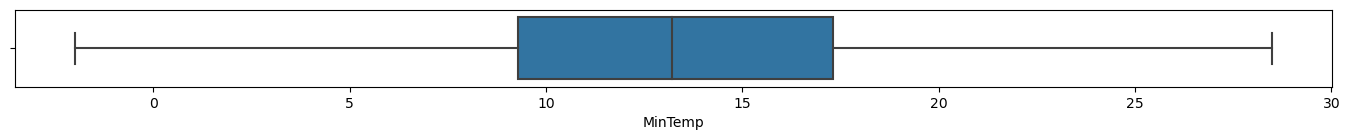

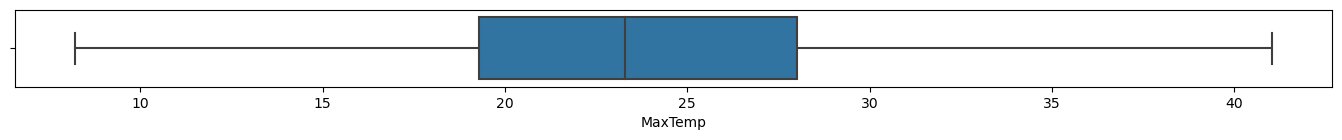

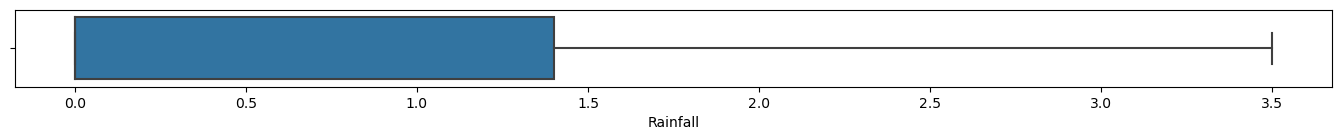

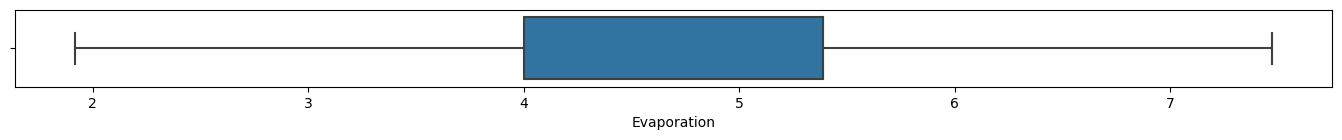

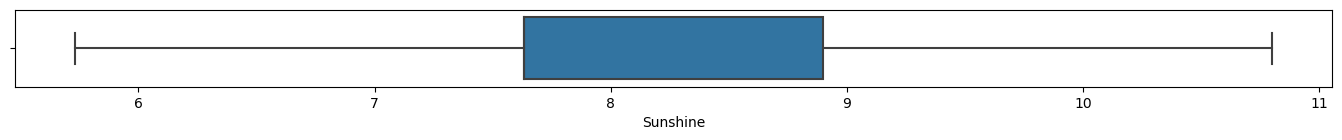

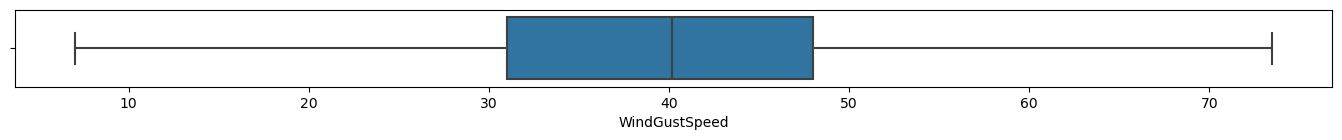

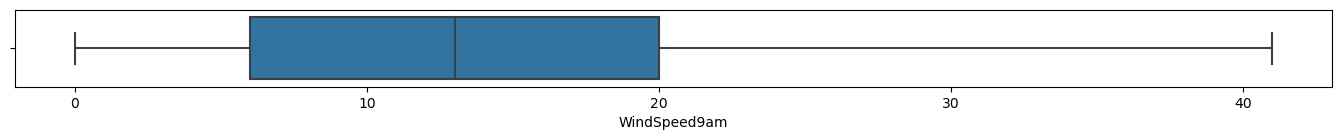

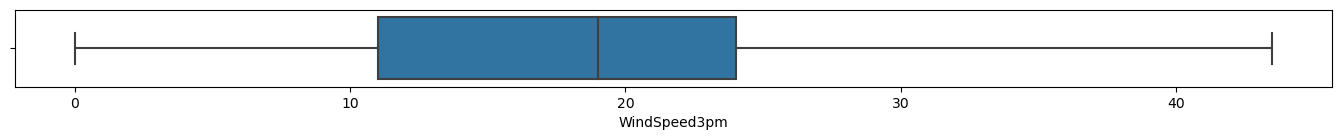

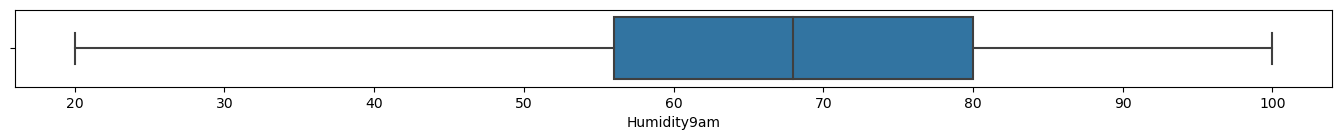

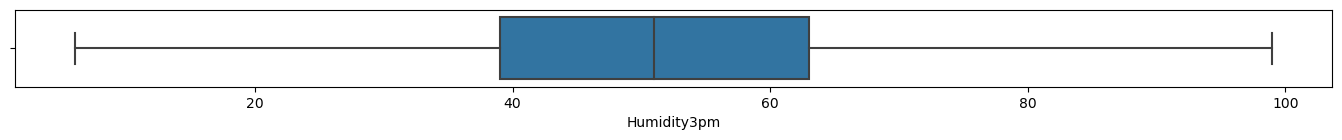

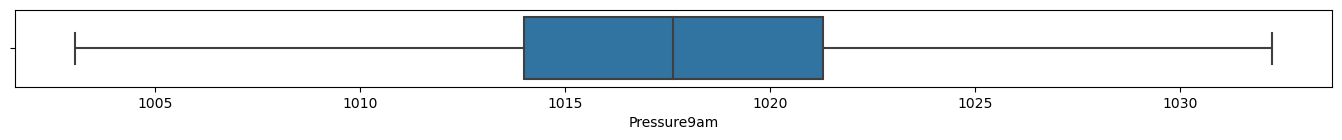

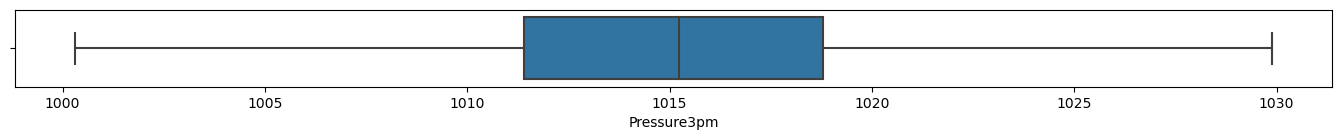

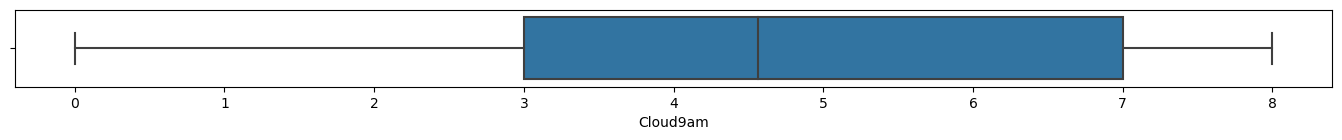

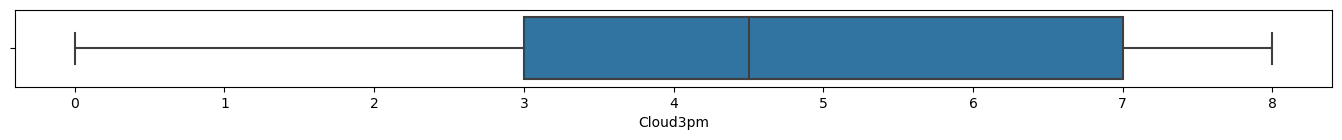

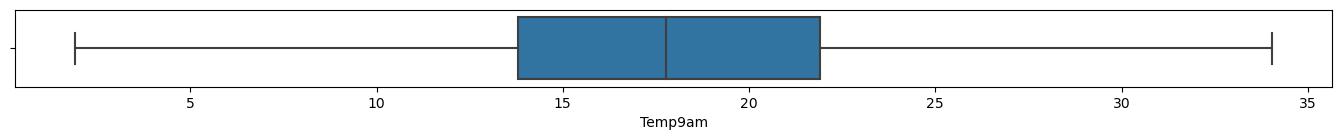

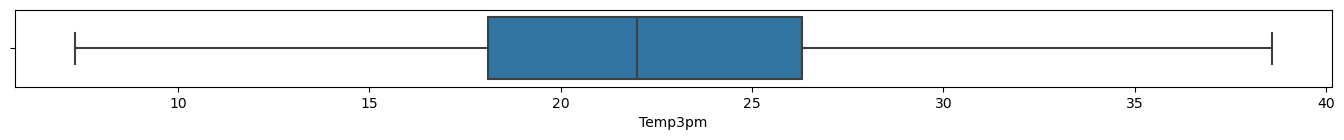

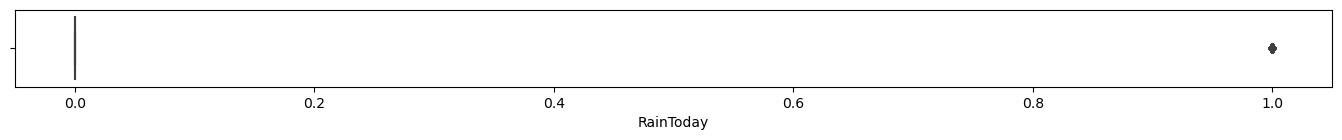

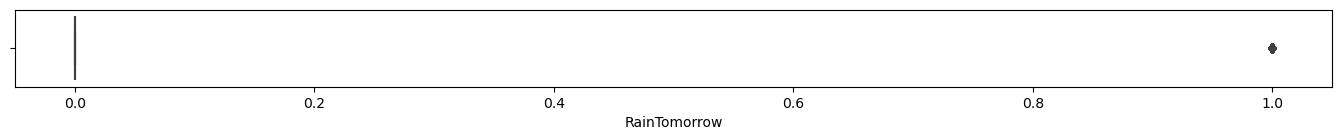

In [368]:
rwf_df_1=rwf_df_1.select_dtypes(exclude=['object'])
for column in rwf_df_1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=rwf_df, x=column)


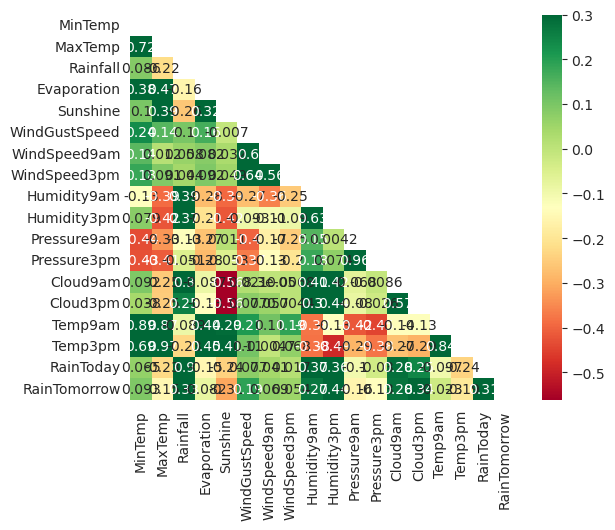

In [369]:
corr = rwf_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [370]:
rwf_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


# Step 3: Data Preprocessing


3.1: Label Encoding

In [371]:
from sklearn.preprocessing import LabelEncoder

for col in rwf_df.columns:
    if rwf_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        rwf_df[col] = encoder.fit_transform(rwf_df[col])


3.2: Feature Selection

In [372]:
rwf_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [377]:
X = rwf_df.drop('RainTomorrow', axis=1)
Y = rwf_df['RainTomorrow']

In [378]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)


In [379]:
selector.fit(X, Y)


ExtraTreesClassifier(random_state=42)

In [380]:
feature_imp = selector.feature_importances_


In [381]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 4.06
1 3.05
2 3.95
3 3.92
4 5.92
5 2.79
6 5.18
7 3.3
8 5.17
9 3.46
10 3.67
11 3.64
12 3.85
13 5.05
14 12.46
15 3.98
16 3.96
17 4.29
18 6.45
19 3.71
20 4.11
21 4.04


In [382]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

 Fixing imbalanced dataset using Oversampling


In [383]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.37 %
1    23.63 %
Name: RainTomorrow, dtype: object

In [384]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)


In [385]:
ros.fit(X, Y)


RandomOverSampler(random_state=42)

In [386]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)


In [387]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    50.0 %
1    50.0 %
Name: RainTomorrow, dtype: object

 Creating a train test split

In [388]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Data Modelling

4.1: Logistic Regression

In [389]:
lr = LogisticRegression(random_state=42)


In [390]:
lr.fit(X_train, Y_train)


LogisticRegression(random_state=42)

In [391]:
y_pred = lr.predict(X_test)


In [392]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.7874902874902875


In [393]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 76.99630852924034%
Testing Accuracy  : 78.74902874902875%


4.2: KNN Classifier

In [394]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [395]:
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [396]:
y_pred_1 = knn.predict(X_test)


In [397]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))


Accuracy: 0.865967365967366


In [398]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 90.21760248688557%
Testing Accuracy  : 86.5967365967366%


4.3: Support Vector Classifier

In [399]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [400]:
svc.fit(X_train, Y_train)


SVC(random_state=42)

In [401]:
Y_pred_2 = svc.predict(X_test)


In [402]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))


Accuracy: 0.8438228438228438


In [403]:
print("Training Accuracy : {}%".format(svc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(svc.score(X_test, Y_test) * 100))

Training Accuracy : 85.97241111326987%
Testing Accuracy  : 84.38228438228438%


4.4: Decision Tree Classifier


In [404]:
dc = DecisionTreeClassifier(random_state=42)


In [405]:
dc.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [406]:
y_pred_3 = dc.predict(X_test)


In [407]:
print("Training Accuracy : {}%".format(dc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 93.3954933954934%


In [408]:
rfc = RandomForestClassifier(random_state=42)


In [409]:
rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [410]:
y_pred_4 = rfc.predict(X_test)


In [411]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_4))


Accuracy: 0.9693084693084693


In [412]:
print("Training Accuracy : {}%".format(rfc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rfc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 96.93084693084693%


4.6: XGB Classifier

In [413]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


In [414]:
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [415]:
y_pred_5 = xgb.predict(X_test)


In [416]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_5))


Accuracy: 0.9514374514374514


In [417]:
print("Training Accuracy : {}%".format(xgb.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(xgb.score(X_test, Y_test) * 100))

Training Accuracy : 99.75714008160094%
Testing Accuracy  : 95.14374514374514%


# Model Evaluation

In [418]:
from sklearn.metrics import f1_score


In [420]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred) * 100, 2))


Logistic Regression:
Accuracy score: 78.75
F1 score: 78.61


In [421]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_1) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_1) * 100, 2))

KNN Classifier:
Accuracy score: 86.6
F1 score: 87.26


In [422]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_2) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_2) * 100, 2))

Support Vector Classifier:
Accuracy score: 84.38
F1 score: 84.64


In [423]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_3) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_3) * 100, 2))

Decision Tree Classifier:
Accuracy score: 93.4
F1 score: 93.69


In [424]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_4) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_4) * 100, 2))

Random Forest Classifier:
Accuracy score: 96.93
F1 score: 96.99


In [425]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_5) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_5) * 100, 2))

XGB Classifier:
Accuracy score: 95.14
F1 score: 95.26


# Hyperparameter Tuning

In [426]:
from sklearn.model_selection import RandomizedSearchCV


In [427]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]


In [428]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [429]:
rfc_tuned = RandomForestClassifier(random_state=42)


In [430]:
rfc_cv = RandomizedSearchCV(
    estimator=rfc_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [431]:
rfc_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [432]:
rfc_cv.best_score_


0.9533707995097018

In [433]:
rfc_cv.best_params_


{'n_estimators': 142, 'max_depth': 110}

In [434]:
rfc_best = RandomForestClassifier(
    max_depth=110, n_estimators=142, random_state=42)

In [435]:
rfc_best.fit(X_train, Y_train)


RandomForestClassifier(max_depth=110, n_estimators=142, random_state=42)

In [436]:
Y_pred_rfc_best = rfc_best.predict(X_test)


In [437]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rfc_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rfc_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 96.97
F1 score: 97.03


Conclusion: 
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 96.97 and f1 score of 97.03.

# 2nd part

# predict how much rainfall could be there.

In [438]:
X = rwf_df.drop('Rainfall', axis=1)
Y = rwf_df['Rainfall']

In [439]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

 Creating a train test split

In [441]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Data Modelling

1:KNeighborsRegressor

In [442]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [443]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [444]:
y_pred_1= knn.predict(X_test)


In [446]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 87.21974238443902%
Testing Accuracy  : 80.28069028731943%


DecisionTreeRegressor

In [447]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_2=dtr.predict(X_test)

In [448]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 87.6631530232779%


RandomForestRegressor

In [450]:
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_test)

In [451]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 98.75412461235284%
Testing Accuracy  : 91.97023694173623%


LinearRegression

In [454]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_4=lr.predict(X_test)

In [455]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 81.66096457563394%
Testing Accuracy  : 81.30861147091252%


# model evaluation 

In [460]:
print('KNN Regressor:')
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_1)
print('R-squared (R2) Score:', round(r2, 2))
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred_1)
print('Mean Absolute Error:', round(mae, 2))


KNN Regressor:
R-squared (R2) Score: 0.8
Mean Absolute Error: 0.3


In [461]:
print('Decision Tree Regressor:')
mae = mean_absolute_error(Y_test, y_pred_2)
print('Mean Absolute Error:', round(mae, 2))

r2 = r2_score(Y_test, y_pred_2)
print('R-squared (R2) Score:', round(r2, 2))




Decision Tree Regressor:
Mean Absolute Error: 0.15
R-squared (R2) Score: 0.88


In [462]:
print('RandomForestRegressor')
mae = mean_absolute_error(Y_test, y_pred_3)
print('Mean Absolute Error:', round(mae, 2))

r2 = r2_score(Y_test, y_pred_3)
print('R-squared (R2) Score:', round(r2, 2))


RandomForestRegressor
Mean Absolute Error: 0.2
R-squared (R2) Score: 0.92


In [463]:
print('LinearRegression')
mae = mean_absolute_error(Y_test, y_pred_4)
print('Mean Absolute Error:', round(mae, 2))

r2 = r2_score(Y_test, y_pred_4)
print('R-squared (R2) Score:', round(r2, 2))


LinearRegression
Mean Absolute Error: 0.33
R-squared (R2) Score: 0.81


# Hyperparameter Tuning

In [464]:
rf_regressor = RandomForestRegressor()


In [469]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]


In [475]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [476]:
rfr_tuned = RandomForestRegressor(random_state=42)


In [478]:
rfr_cv = RandomizedSearchCV(estimator = rfr_tuned, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [479]:
rfr_cv.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [480]:
rfr_cv.best_score_


0.887739281408329

In [481]:
rfr_cv.best_params_


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [488]:
rfr_best = RandomForestRegressor(
    n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 100,
 bootstrap= True)

In [490]:
rfr_best.fit(X_train, Y_train)


RandomForestRegressor(max_depth=100, n_estimators=1400)

In [491]:
Y_pred_rfr_best = rfr_best.predict(X_test)


In [493]:
print('RandomForestRegressor')
mse = mean_squared_error(Y_test, Y_pred_rfr_best)
print("Mean Squared Error on Test Set:", mse)
r2 = r2_score(Y_test, Y_pred_rfr_best)

print(f'R-squared: {r2}')

RandomForestRegressor
Mean Squared Error on Test Set: 0.14002995814440736
R-squared: 0.9198216509580164


Conclusion:
KNN IS GIVING THE BEST SCORE